<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Metodo_de_aceptacion_y_rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elaborar un código en Python que implemente el método de Aceptación y Rechazo para generar la distribución triangular de parámetros $a=1, b=3, c=5$

*   Analíticamente
*   Mediante simulación

Es necesario que el programa de explícitamente el resultado: histograma, media y desviación estándar y lo compare contra los resultados teóricos.


Calculando los valores analiticamente de la funcion:
$$ f(x) =
\begin{cases}
  \frac{2\cdot(x - a)}{(c - a)\cdot(b - a)} & \text{si } a \leq x \leq b \\
  \frac{2\cdot(c - x)}{(c - a)\cdot(c - b)} & \text{si } b < x \leq c
\end{cases}
$$

In [42]:
# Importando las librerias necesarias para hacer el
# calculo de la integral sin conocer los valores de las constantes, a, b, c
from sympy import symbols
from sympy import Piecewise
from sympy import integrate
from sympy import simplify
from sympy import pprint

In [43]:
# Variables simbólicas
x, a, b, c = symbols('x a b c', real=True)

In [44]:
# Definir función por tramos
f1 = 2 * (x - a) / ((c - a) * (b - a))  # a ≤ x ≤ b
f2 = 2 * (c - x) / ((c - a) * (c - b))  # b < x ≤ c

In [45]:
# Calcular la media
media_alg = integrate(x * f1, (x, a, b)) + integrate(x * f2, (x, b, c))

In [46]:
# Calcular E[X²]
ex2 = integrate(x**2 * f1, (x, a, b)) + integrate(x**2 * f2, (x, b, c))

In [47]:
# Varianza
varianza_alg = simplify(ex2 - media_alg**2)

In [48]:
# Desviacion estandar
desviacion_alg = simplify(varianza_alg**0.5)

In [49]:
# Mostrar resultados
print("Media:")
print(simplify(media_alg))

print("\nVarianza:")
print(varianza_alg)

print("\nDesviación estándar:")
print(desviacion_alg)

Media:
a/3 + b/3 + c/3

Varianza:
a**2/18 - a*b/18 - a*c/18 + b**2/18 - b*c/18 + c**2/18

Desviación estándar:
0.235702260395516*(a**2 - a*b - a*c + b**2 - b*c + c**2)**0.5


Ahora calculando la media y varianza de la funcion de forma analitica con los valores
$$a=1, b=3, c=5$$

In [50]:
# Definir variables y constantes
x = symbols('x', real=True)
a = 1
b = 3
c = 5

In [51]:
# Definir las dos partes de la función triangular
f1 = 2 * (x - a) / ((c - a) * (b - a))  # para x en [a, b]
f2 = 2 * (c - x) / ((c - a) * (c - b))  # para x en [b, c]

In [52]:
# Calcular la media
media = integrate(x * f1, (x, a, b)) + integrate(x * f2, (x, b, c))

# Calcular E[X²]
ex2 = integrate(x**2 * f1, (x, a, b)) + integrate(x**2 * f2, (x, b, c))

# Varianza: E[X^2] - (E[X])^2
varianza = simplify(ex2 - media**2)

# Desviacion estandar
desviacion = simplify(varianza**0.5)

print("La media calculada analitica es: ", media)
print("La varianza calculada analiticamente es: ", varianza)
print("La desviacion estandar calculada analiticamente es: ", desviacion)

La media calculada analitica es:  3
La varianza calculada analiticamente es:  2/3
La desviacion estandar calculada analiticamente es:  0.816496580927726


Calculando los valores de la media y la varianza mediante simulacion por el metodo de *Aceptacion y rechazo*

In [53]:
# Importando las librerias necesarias
# para hacer la simulacion y graficar el histograma
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [54]:
# Declarando las variables necesarias para hacer el calculo
a = 1
b = 3
c = 5
# Valor calculado previamente en clase, pero recordar que
# se debe de hacer mediante el criterio de la primera y/o
# segunda derivada para encontrar el punto maximo
M = 2/(c-a)

In [55]:
# Definiendo la funcion a trozos para ser evaluado
def f(x):
  if a <= x <= b:
    return 2*(x - a)/((c - a)*(b - a))
  elif b < x <= c:
    return 2*(c - x)/((c - a)*(c - b))
  else:
    return 0 # En caso de que se genere un valor fuera del intervalo

In [56]:
# Definiendo el metodo de aceptacion y rechazo
def aceptacion(n):
  # Se declara una lista donde se fuardara el valor de x generado
  lista = []
  for _ in range(n):
    # Se generan dos numeros aleatorios para generar el numero
    # aleatorio x mediante la operacion necesaria en el metodo
    # y para ver si se cumple la condicional para agregar el
    # numero aleatorio a la lista declarada previamente
    R1 = random()
    R2 = random()
    x = a + (c-a)*R1
    if R2 <= f(x)/M:
      lista.append(x)
  return lista

In [57]:
# Se ejecuta 50,000 veces el metodo de aceptacion
k = 50000
d = aceptacion(k)

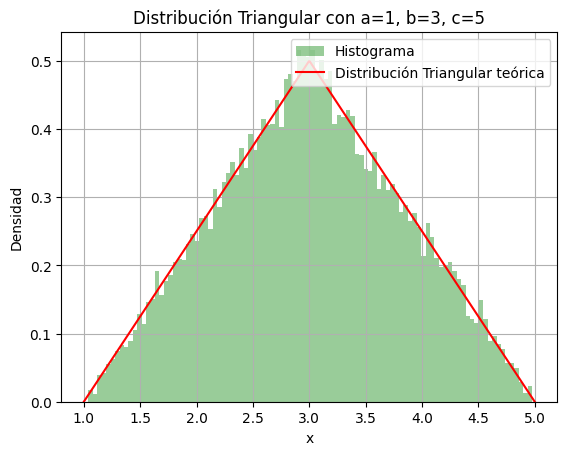

In [58]:
# Se hace el histograma de los valores generados de
# x que estan en la lista, y se grafica el triangulo,
# para ver que en efecto se sigue una distribucion triangular
plt.hist(d, bins=100, density=True, color = "green", alpha=0.4, label='Histograma')
x_vals = np.linspace(a, c, 500)
f_vals = [f(x) for x in x_vals]
plt.plot(x_vals, f_vals, color='red', label='Distribución Triangular teórica')
plt.title('Distribución Triangular con a=1, b=3, c=5')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Con la lista almacenada en la variable d
# se calcula el valor aproximado de la media y la varianza
print("Media aproximada: ", np.mean(d))
print("Varianza aproximada: ", np.var(d))
print("Desviacion estandar aproximada: ", np.std(d))
# Se calcula la exactitud de los calculos hechos mediante
# la simulacion contra los calculos hechos analiticamente
E_abs_med = abs(np.mean(d)-media)
E_abs_var = abs(np.var(d)-varianza)
E_absa_des = abs(np.std(d)-desviacion)

Media aproximada:  3.004043002826007
Varianza aproximada:  0.6636267362287028
Desviacion estandar aproximada:  0.8146328843280898


In [60]:
print("El error absoluto de la media son: ", E_abs_med)
print("El porcentaje de aceptacion de la media es: ", abs(np.mean(d)/media)*100, "%")
print("El error absoluto de la varianza son: ", E_abs_var)
print("El porcentaje de aceptacion de la varianza es: ", abs(np.var(d)/varianza)*100, "%")
print("El error absoluto de la desviacion estandar son: ", E_absa_des)
print("El porcentaje de aceptacion de la desviacion estandar es: ", abs(np.std(d)/desviacion)*100, "%")

El error absoluto de la media son:  0.00404300282600678
El porcentaje de aceptacion de la media es:  100.134766760867 %
El error absoluto de la varianza son:  0.00303993043796380
El porcentaje de aceptacion de la varianza es:  99.5440104343054 %
El error absoluto de la desviacion estandar son:  0.00186369659963626
El porcentaje de aceptacion de la desviacion estandar es:  99.7717447147765 %


In [61]:
# Se ve la longitud de la lista, y como solo
# se agregan valores de x a la lista que cumplieran
# con la simulacion, por lo tanto sera el numero de
#veces que la simulacion tuvo exito
print("El numero de veces que la simulacion tuvo exito son: ", len(d))
print("De un total de ", k, "veces")
print("El promedio de veces que se tuvo exito es de: ", (len(d)/k) *100, "%")

El numero de veces que la simulacion tuvo exito son:  24964
De un total de  50000 veces
El promedio de veces que se tuvo exito es de:  49.928 %
